# Prediction of Flight Price

## Importing necessary libraries

In [129]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import math


In [2]:
data=pd.read_excel("E:/Analytics/Project/Flight Data/archive/Data_Train.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Cleaning

## checking  column "Airline"

In [5]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [6]:
data.Airline=data.Airline.str.replace("Multiple carriers Premium economy","Multiple carriers")

In [7]:
data.Airline=data.Airline.str.replace("Jet Airways Business","Jet Airways")

In [8]:
data.Airline=data.Airline.str.replace("Vistara Premium economy","Vistara")

<font color='blue' size=3>  Here we're bringing together both economy and business class under one column for Multiple carriers, Jet Airways and Vistara </font>

In [9]:
data.Airline.value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

## checking Column "Date_of_Journey"

In [10]:
data.Date_of_Journey=pd.to_datetime(data.Date_of_Journey)

In [11]:
data["month_of_Journey"]=data.Date_of_Journey.dt.month

In [12]:
data["Day_of_Journey"]=data.Date_of_Journey.dt.day

In [13]:
data.drop("Date_of_Journey",axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Arrival_Time      10683 non-null  object
 6   Duration          10683 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10683 non-null  object
 9   Price             10683 non-null  int64 
 10  month_of_Journey  10683 non-null  int64 
 11  Day_of_Journey    10683 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1001.7+ KB


In [15]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


<font color='blue' size=3>  Seperated the month and day of journey into seperate columns and then dropping 'Date of Journey' column </font>

## checking column "Source"

In [16]:
data.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## checking column "Destination"

In [17]:
data.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [18]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


## Checking column "Dep_Time"

In [19]:
data[["Dep_Time in hr","Dep_Time in min"]]=data["Dep_Time"].str.split(":",expand=True)

In [20]:
data.drop("Dep_Time",axis=1,inplace=True)

In [21]:
data["Dep_Time in hr"]=data["Dep_Time in hr"].astype(int)

In [22]:
data["Dep_Time in min"]=data["Dep_Time in min"].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Arrival_Time      10683 non-null  object
 5   Duration          10683 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10683 non-null  object
 8   Price             10683 non-null  int64 
 9   month_of_Journey  10683 non-null  int64 
 10  Day_of_Journey    10683 non-null  int64 
 11  Dep_Time in hr    10683 non-null  int32 
 12  Dep_Time in min   10683 non-null  int32 
dtypes: int32(2), int64(3), object(8)
memory usage: 1001.7+ KB


In [24]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


## Checking column "Arrival_time"

In [25]:
data["Arrival_Time in hr"]=pd.to_datetime(data["Arrival_Time"]).dt.hour

In [26]:
data["Arrival_Time in minute"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [27]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 10683 non-null  object
 1   Source                  10683 non-null  object
 2   Destination             10683 non-null  object
 3   Route                   10682 non-null  object
 4   Arrival_Time            10683 non-null  object
 5   Duration                10683 non-null  object
 6   Total_Stops             10682 non-null  object
 7   Additional_Info         10683 non-null  object
 8   Price                   10683 non-null  int64 
 9   month_of_Journey        10683 non-null  int64 
 10  Day_of_Journey          10683 non-null  int64 
 11  Dep_Time in hr          10683 non-null  int32 
 12  Dep_Time in min         10683 non-null  int32 
 13  Arrival_Time in hr      10683 non-null  int64 
 14  Arrival_Time in minute  10683 non-null  int64 
dtypes:

In [29]:
data.drop("Arrival_Time",axis=1,inplace=True)

In [30]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


##  Handling column "Duration"

In [31]:
data.Duration=data.Duration.str.replace("h",":")
data.Duration=data.Duration.str.replace("m","")

In [32]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2: 50,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7: 25,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19:,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5: 25,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4: 45,1 stop,No info,13302,1,3,16,50,21,35


In [33]:
data[["Duration in hr","Duration in min"]]=data.Duration.str.split(":",expand=True)

In [34]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,Duration in hr,Duration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2: 50,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7: 25,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19:,2 stops,No info,13882,9,6,9,25,4,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5: 25,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4: 45,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [35]:
data.drop("Duration",axis=1,inplace=True)

In [36]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,Duration in hr,Duration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [37]:
data["Duration in hr"]=pd.to_numeric(data["Duration in hr"])

In [38]:
data["Duration in min"]=pd.to_numeric(data["Duration in min"])

In [39]:
data["Duration in min"]=data["Duration in min"].fillna(0)

In [40]:
data["Duration in min"]=data["Duration in min"].astype(int)

In [41]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,Duration in hr,Duration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


<font color='blue' size=3>  Seperated Arrival time, Departure Time and Duration into there corresponding hour and minute columns and dropping the original columns </font>

## Handling the Total_Stops column

In [42]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
data["Total_Stops"].isnull().sum()

1

In [44]:
data["Total_Stops"]=data["Total_Stops"].fillna("2")

In [45]:
data["Total_Stops"]=data["Total_Stops"].str.replace("non-stop","0")
data["Total_Stops"]=data["Total_Stops"].str.replace("1 stop","1")
data["Total_Stops"]=data["Total_Stops"].str.replace("2 stops","2")
data["Total_Stops"]=data["Total_Stops"].str.replace("3 stops","3")
data["Total_Stops"]=data["Total_Stops"].str.replace("4 stops","4")

In [46]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,Duration in hr,Duration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [47]:
data.Total_Stops=data.Total_Stops.astype(int)

In [48]:
data.drop("Additional_Info",axis=1,inplace=True)

In [49]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,Duration in hr,Duration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45


In [50]:
data["TotalDuration in min"]=data["Duration in hr"]*60+data["Duration in min"]

In [51]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,Duration in hr,Duration in min,TotalDuration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,3,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45,285


In [52]:
data.drop(["Duration in hr","Duration in min"],axis=1,inplace=True)

In [53]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,285


# Checking for outliers

In [54]:
data.describe().astype(int)

,Total_Stops,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min
count,10683,10683,10683,10683,10683,10683,10683,10683,10683
mean,0,9087,5,12,12,24,13,24,643
std,0,4611,2,8,5,18,6,16,507
min,0,1759,1,3,0,0,0,0,75
25%,0,5277,3,5,8,5,8,10,170
50%,1,8372,5,6,11,25,14,25,520
75%,1,12373,6,21,18,40,19,35,930
max,4,79512,12,27,23,55,23,55,2860


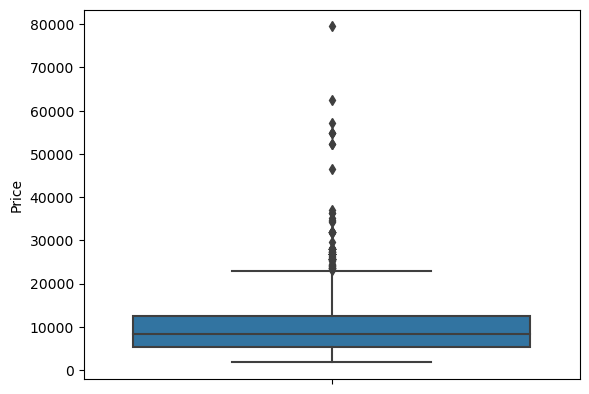

In [55]:
sns.boxplot(y=data["Price"])
plt.show()


In [56]:
lower_quantile=data.Price.quantile(0.25)
upper_quantile=data.Price.quantile(0.75)
median= upper_quantile=data.Price.quantile(0.50)
print(lower_quantile)
print(upper_quantile)
print(median)

5277.0
8372.0
8372.0


In [57]:
IQR=upper_quantile-lower_quantile
IQR

3095.0

In [58]:
upper_whisker=upper_quantile+(1.5*IQR)
upper_whisker

13014.5

In [59]:
data=data[data["Price"]<upper_whisker]
data

,Airline,Source,Destination,Route,Total_Stops,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,445
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,325
5,SpiceJet,Kolkata,Banglore,CCU → BLR,0,3873,6,24,9,0,11,25,145
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,11087,12,3,18,55,10,25,930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,4145,4,27,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,7229,4,27,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,12648,1,3,11,30,14,10,160


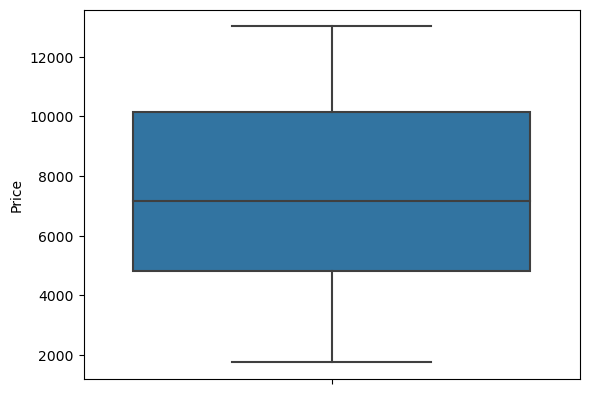

In [60]:
sns.boxplot(y=data["Price"])
plt.show()

<font color='blue' size=3>  Certain number  of outliers are present in the upper range which suggests few exceptionally high ticket prices probably due last minute bookings or premium booking options or travel travel dates coinciding with high-demand periods </font>

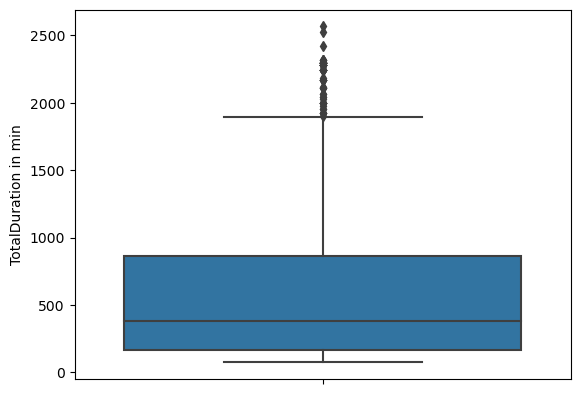

In [61]:
sns.boxplot(y=data["TotalDuration in min"])
plt.show()

In [62]:
lower_quantile=data["TotalDuration in min"].quantile(0.25)
upper_quantile=data["TotalDuration in min"].quantile(0.75)
print(lower_quantile)
print(upper_quantile)

170.0
860.0


In [63]:
IQR=upper_quantile-lower_quantile
IQR

690.0

In [64]:
upper_whisker=upper_quantile+(1.5*IQR)
upper_whisker

1895.0

In [65]:
data=data[data["TotalDuration in min"]<upper_whisker]
data.sample(50)

,Airline,Source,Destination,Route,Total_Stops,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min
5029,IndiGo,Kolkata,Banglore,CCU → BLR,0,4174,6,4,15,30,18,5,155
3798,Air India,Delhi,Cochin,DEL → BLR → COK,1,8907,9,6,9,45,23,0,795
6279,Air India,Banglore,New Delhi,BLR → BOM → NAG → DEL,2,12358,3,3,8,50,10,35,1545
9507,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,10262,6,15,10,0,4,25,1105
7176,IndiGo,Delhi,Cochin,DEL → BOM → COK,1,6628,6,24,9,15,1,30,975
90,Multiple carriers,Delhi,Cochin,DEL → HYD → COK,1,9646,5,27,13,15,22,30,555
655,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0,1965,3,5,13,15,14,45,90
4104,IndiGo,Banglore,Delhi,BLR → DEL,0,3419,6,18,22,10,1,0,170
7799,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,6795,3,6,15,15,1,30,615
9177,IndiGo,Delhi,Cochin,DEL → HYD → MAA → COK,2,6494,3,27,6,40,21,20,880


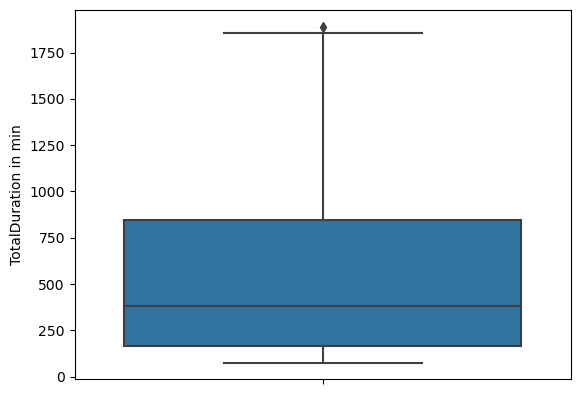

In [66]:
sns.boxplot(y=data["TotalDuration in min"])
plt.show()

<font color='blue' size=3>  Majority of the flights have relatively short duration times except few which is probably due to presence of more number of stops or flight delays</font>

# Handling Duplicate data

In [67]:
data.duplicated().sum()

132

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data.duplicated().sum()


0

# EDA and trends Analysis

In [70]:
data1=data.copy()

## Distribution of different airlines on basis of size in the given routes

In [71]:
Distribution=data.groupby(data1["Airline"]).size().sort_values(ascending=False)
Distribution

Airline
Jet Airways          2334
IndiGo               1992
Air India            1359
Multiple carriers     821
SpiceJet              813
Vistara               469
Air Asia              315
GoAir                 190
Trujet                  1
dtype: int64

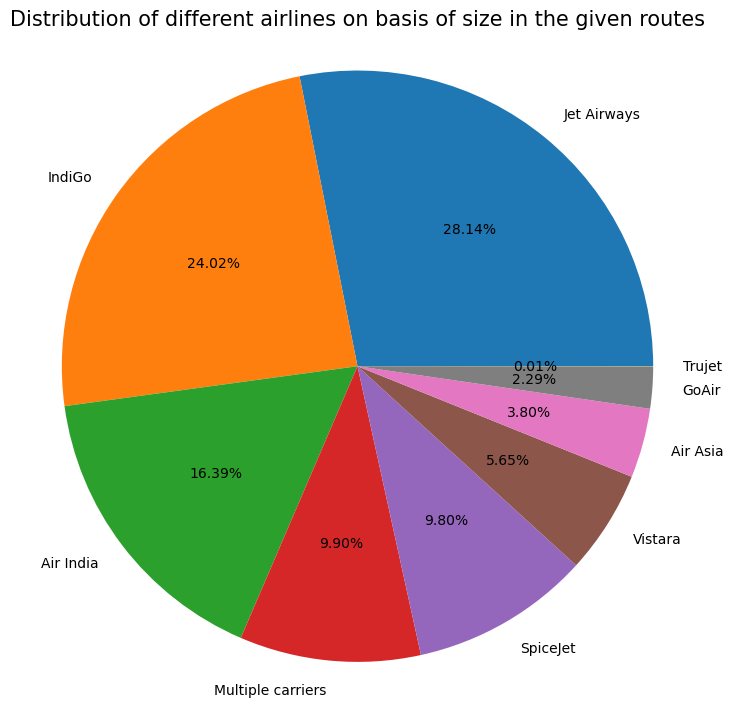

In [72]:
plt.pie(Distribution,autopct="%.2f%%",radius=2,labels=Distribution.index)
plt.title("Distribution of different airlines on basis of size in the given routes",y=1.4,fontsize=15)
plt.show()

<font color='blue' size=3>  Jet Airways have the number of flights and Trujet has the least</font>

## Mean prices of Different Airlines

In [73]:
Airline_prices=data.groupby(data1["Airline"])["Price"].median().round(2).sort_values(ascending=False)
Airline_prices

Airline
Jet Airways          10262.0
Air India             8372.0
Multiple carriers     8310.0
Vistara               7927.0
Air Asia              5162.0
GoAir                 5093.5
IndiGo                4863.0
Trujet                4140.0
SpiceJet              3873.0
Name: Price, dtype: float64

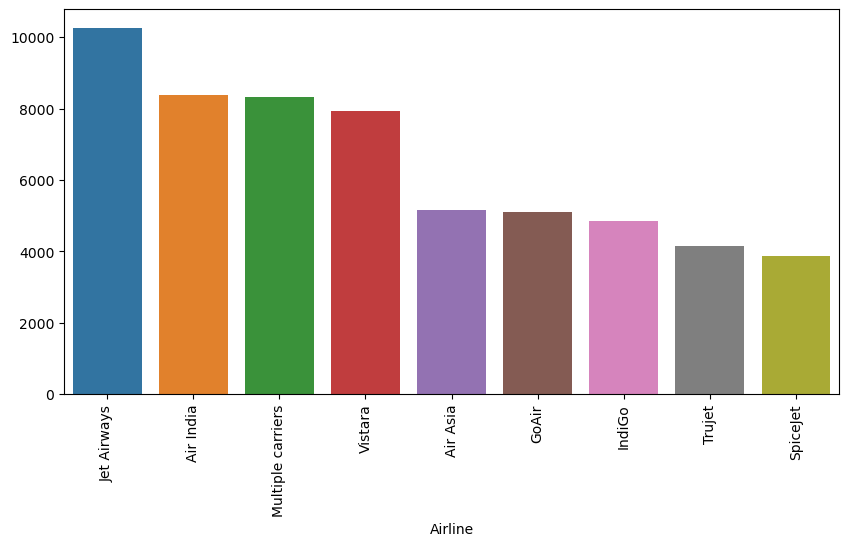

In [74]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=Airline_prices.index,y=Airline_prices.values)
plt.show()

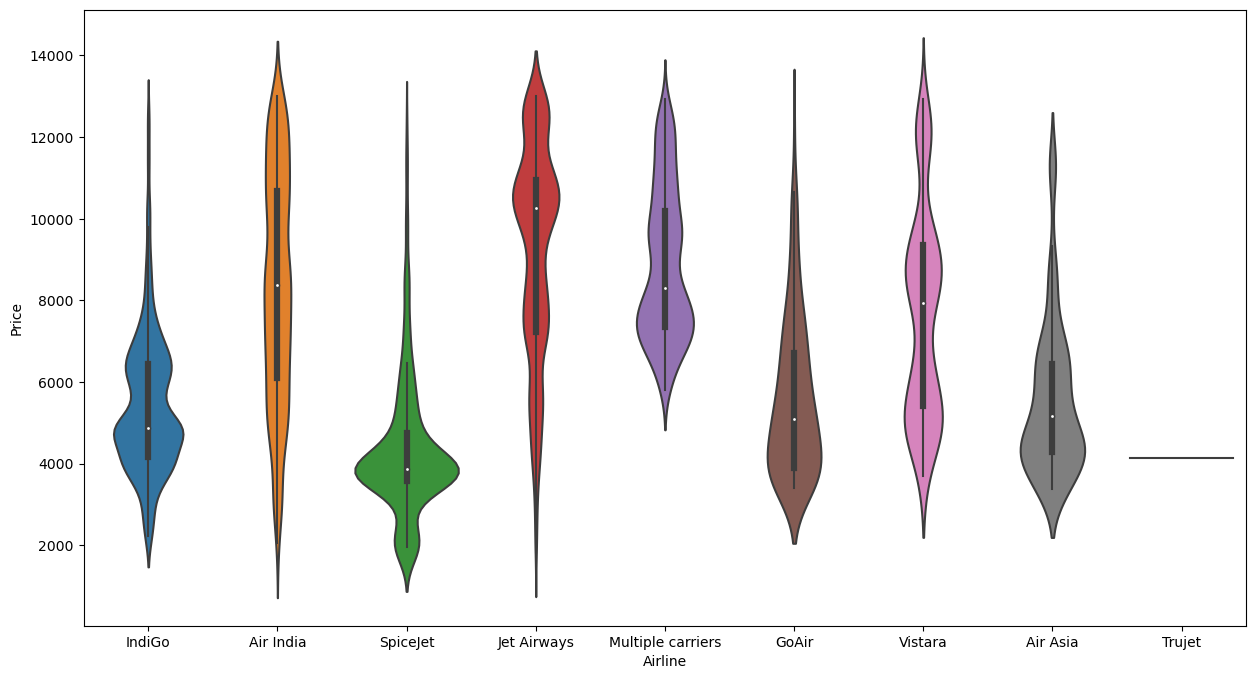

In [75]:
plt.figure(figsize=(15,8))
sns.violinplot(x=data["Airline"],y=data["Price"])
plt.show()

<font color='blue' size=3> The flight prices are cheapest in case of Spicejet and Jet Airways has the highest meddian flight prices.</font>

## Mean prices based on source station

In [76]:
source_prices=data.groupby(data1["Source"])["Price"].mean().round(2).sort_values(ascending=False)
source_prices

Source
Delhi       8680.17
Kolkata     7740.54
Banglore    6179.90
Chennai     4750.84
Mumbai      4315.89
Name: Price, dtype: float64

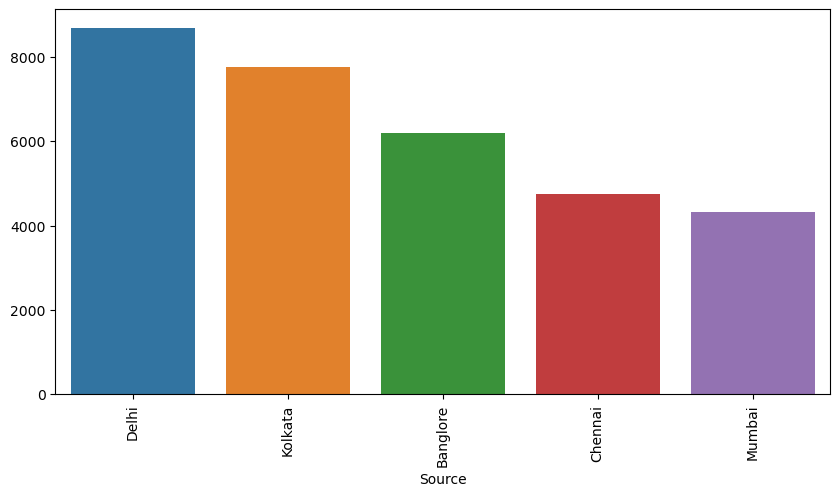

In [77]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=source_prices.index,y=source_prices.values)
plt.show()

<font color='blue' size=3>  Flights having source as Delhi are most expensive while the ones from Chennai are the least </font>

## mean price based on destination station


In [78]:
Destination_prices=data.groupby(data1["Destination"])["Price"].mean().round(2).sort_values(ascending=False)
Destination_prices

Destination
Cochin       8680.17
New Delhi    8317.76
Banglore     7740.54
Delhi        5143.92
Kolkata      4750.84
Hyderabad    4315.89
Name: Price, dtype: float64

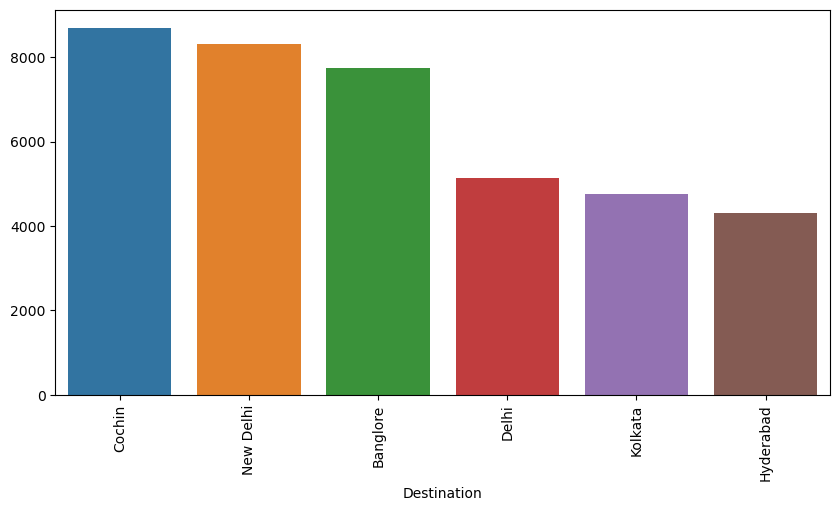

In [79]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=Destination_prices.index,y=Destination_prices.values)
plt.show()

<font color='blue' size=3>  The ticket price of flights destined for Kolkata are the lowest and the ones destined for New Delhi are the highest</font>

## Duration and price relationship

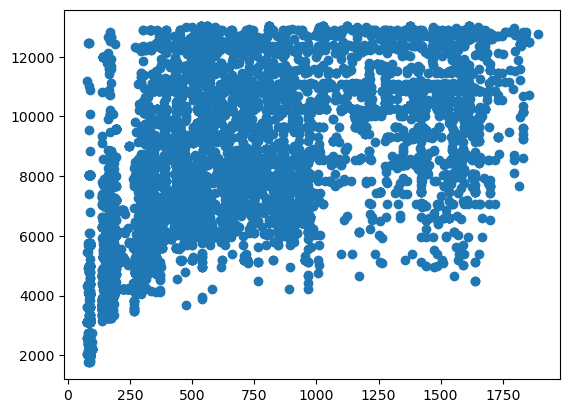

In [80]:
plt.scatter(x=data1["TotalDuration in min"] ,y=data1["Price"])
plt.show()

In [81]:
data1["TotalDuration in min"].corr(data1["Price"])

0.6667635588534162

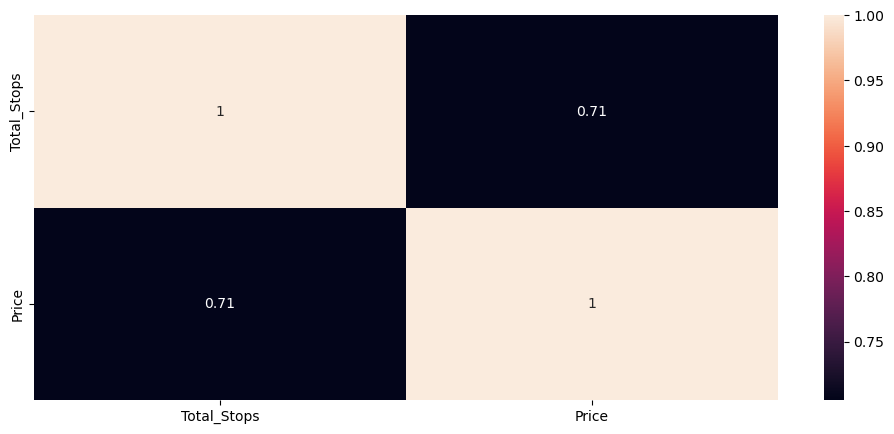

In [82]:

dat=data[["Total_Stops","Price"]]
plt.figure(figsize=(12,5))
sns.heatmap(dat.corr(),annot=True)
plt.show()

<font color='blue' size=3>  Price vs Total stops has a high positive correlation</font>

In [83]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8294 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 8294 non-null   object
 1   Source                  8294 non-null   object
 2   Destination             8294 non-null   object
 3   Route                   8293 non-null   object
 4   Total_Stops             8294 non-null   int32 
 5   Price                   8294 non-null   int64 
 6   month_of_Journey        8294 non-null   int64 
 7   Day_of_Journey          8294 non-null   int64 
 8   Dep_Time in hr          8294 non-null   int32 
 9   Dep_Time in min         8294 non-null   int32 
 10  Arrival_Time in hr      8294 non-null   int64 
 11  Arrival_Time in minute  8294 non-null   int64 
 12  TotalDuration in min    8294 non-null   int64 
dtypes: int32(3), int64(6), object(4)
memory usage: 810.0+ KB


# Predictive modelling

## One hot encoding for the columns Airlines, Source, Destinaton & Total_Stops

In [84]:
data1=pd.get_dummies(data1, columns=["Airline","Source","Destination","Total_Stops"])

In [85]:
data1.head()

,Route,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min,Airline_Air Asia,...,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_0,Total_Stops_1,Total_Stops_2,Total_Stops_3
0,BLR → DEL,3897,3,24,22,20,1,10,170,0,...,0,0,0,0,0,1,1,0,0,0
1,CCU → IXR → BBI → BLR,7662,1,5,5,50,13,15,445,0,...,1,0,0,0,0,0,0,0,1,0
3,CCU → NAG → BLR,6218,12,5,18,5,23,30,325,0,...,1,0,0,0,0,0,0,1,0,0
5,CCU → BLR,3873,6,24,9,0,11,25,145,0,...,1,0,0,0,0,0,1,0,0,0
6,BLR → BOM → DEL,11087,12,3,18,55,10,25,930,0,...,0,0,0,0,0,1,0,1,0,0


## Handling Route

In [86]:
route= data[['Route']]

In [87]:
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[2]
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]

route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
5,CCU → BLR,CCU,BLR,NaN,NaN,NaN
6,BLR → BOM → DEL,BLR,BOM,DEL,NaN,NaN


In [88]:
route.fillna('None', inplace= True)
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
5,CCU → BLR,CCU,BLR,None,None,None
6,BLR → BOM → DEL,BLR,BOM,DEL,None,None


## Label Encoding Route column

In [89]:
LE= LabelEncoder()
for i in range(1, 6):
    col= 'Route_'+ str(i)
    route[col]= LE.fit_transform(route[col])
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,12,24,10,3
1,CCU → IXR → BBI → BLR,2,23,1,1,3
3,CCU → NAG → BLR,2,29,3,10,3
5,CCU → BLR,2,5,24,10,3
6,BLR → BOM → DEL,0,7,7,10,3


In [90]:
route.drop('Route', axis= 1, inplace = True)
route.head()

,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,12,24,10,3
1,2,23,1,1,3
3,2,29,3,10,3
5,2,5,24,10,3
6,0,7,7,10,3


In [91]:
data1.drop('Route', axis= 1, inplace= True)
data1= pd.concat([data1, route], axis=1)
data1.head()

,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min,Airline_Air Asia,Airline_Air India,...,Destination_New Delhi,Total_Stops_0,Total_Stops_1,Total_Stops_2,Total_Stops_3,Route_1,Route_2,Route_3,Route_4,Route_5
0,3897,3,24,22,20,1,10,170,0,0,...,1,1,0,0,0,0,12,24,10,3
1,7662,1,5,5,50,13,15,445,0,1,...,0,0,0,1,0,2,23,1,1,3
3,6218,12,5,18,5,23,30,325,0,0,...,0,0,1,0,0,2,29,3,10,3
5,3873,6,24,9,0,11,25,145,0,0,...,0,1,0,0,0,2,5,24,10,3
6,11087,12,3,18,55,10,25,930,0,0,...,1,0,1,0,0,0,7,7,10,3


<font color='blue' size=3>  Splitting the data into train and test data</font>

## Train-test Split

In [92]:
X=data1.drop("Price",axis=1)
Y=data1["Price"]

In [93]:
Y.head()

0     3897
1     7662
3     6218
5     3873
6    11087
Name: Price, dtype: int64

In [94]:
X.head()

,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Total_Stops_0,Total_Stops_1,Total_Stops_2,Total_Stops_3,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,24,22,20,1,10,170,0,0,0,...,1,1,0,0,0,0,12,24,10,3
1,1,5,5,50,13,15,445,0,1,0,...,0,0,0,1,0,2,23,1,1,3
3,12,5,18,5,23,30,325,0,0,0,...,0,0,1,0,0,2,29,3,10,3
5,6,24,9,0,11,25,145,0,0,0,...,0,1,0,0,0,2,5,24,10,3
6,12,3,18,55,10,25,930,0,0,0,...,1,0,1,0,0,0,7,7,10,3


In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=3)
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)

(5805, 36) (2489, 36) (5805,) (2489,)


In [96]:
model=LinearRegression()

In [97]:
model.fit(X_train,Y_train)

LinearRegression()

In [98]:
model.coef_

array([ 1.15858758e+01, -2.12043843e+01,  2.99973927e+00,  2.90034325e+00,
        7.60171972e+00,  1.98721057e+00,  6.91731291e-01, -7.99704716e+02,
        5.61832117e+02, -9.32256247e+02, -5.62219031e+02,  1.96292439e+03,
        9.68966904e+02, -1.03251805e+03, -1.34668581e+03,  1.17966044e+03,
        3.37363626e+02, -1.75381103e+01,  1.86405437e+02,  5.67945379e+01,
       -5.63025491e+02,  5.67945379e+01,  1.86405437e+02, -5.32987488e+02,
       -5.63025491e+02, -1.75381103e+01,  8.70351114e+02, -1.28289507e+03,
        1.89149146e+02,  9.59255764e+02,  1.34490157e+02,  3.96274557e+01,
       -2.31272759e+01, -2.98116959e+01, -1.29948643e+02, -1.25767414e+03])

In [99]:
model.intercept_

12152.367909326718

In [100]:
y_pred=model.predict(X_test)
y_pred

array([ 9821.86754281,  2470.59418648,  4797.16487568, ...,
        7121.76880592,  6314.86551831, 10040.38278183])

In [101]:
model.score(X_train,Y_train)

0.6955096905445625

In [102]:
model.score(X_test,Y_test)

0.6911584085573267

In [103]:
mse = np.mean((model.predict(X_test)-Y_test)**2)
mse

2661935.898350722

In [104]:
math.sqrt(mse)

1631.544022805

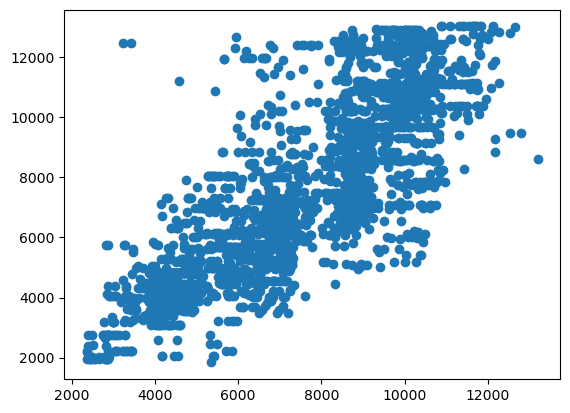

In [105]:
plt.scatter(y_pred,Y_test)
plt.show()

# inference
It can be seen for lower price range the predicted prices are fairly accurate but as the prices increase there is a increase in deviation in the predicted prices..However inorder to reduce the error we would normalise the data and conduct the Linear regression again.

# predictive modelling after Normalisation

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
model1=MinMaxScaler()
model1

MinMaxScaler()

In [108]:
data2=pd.DataFrame(model1.fit_transform(data1),columns=data1.columns)

In [109]:
data2

,Price,month_of_Journey,Day_of_Journey,Dep_Time in hr,Dep_Time in min,Arrival_Time in hr,Arrival_Time in minute,TotalDuration in min,Airline_Air Asia,Airline_Air India,...,Destination_New Delhi,Total_Stops_0,Total_Stops_1,Total_Stops_2,Total_Stops_3,Route_1,Route_2,Route_3,Route_4,Route_5
0,0.189960,0.181818,0.875000,0.956522,0.363636,0.043478,0.181818,0.052342,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.307692,1.000000,1.0,1.0
1,0.524478,0.000000,0.083333,0.217391,0.909091,0.565217,0.272727,0.203857,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.4,0.589744,0.041667,0.1,1.0
2,0.396179,1.000000,0.083333,0.782609,0.090909,1.000000,0.545455,0.137741,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.4,0.743590,0.125000,1.0,1.0
3,0.187828,0.454545,0.875000,0.391304,0.000000,0.478261,0.454545,0.038567,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.4,0.128205,1.000000,1.0,1.0
4,0.828787,1.000000,0.000000,0.782609,1.000000,0.434783,0.454545,0.471074,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.179487,0.291667,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,0.208618,0.727273,0.041667,0.826087,1.000000,0.956522,0.454545,0.041322,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.4,0.128205,1.000000,1.0,1.0
8290,0.211995,0.272727,1.000000,0.869565,0.818182,1.000000,0.363636,0.044077,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.4,0.128205,1.000000,1.0,1.0
8291,0.486006,0.272727,1.000000,0.347826,0.363636,0.478261,0.363636,0.057851,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.307692,1.000000,1.0,1.0
8292,0.967481,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,0.046832,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.307692,1.000000,1.0,1.0


## Train-test Split on Normalised Data

In [110]:
X_norm=data2.drop("Price",axis=1)
Y_norm=data2["Price"]

In [111]:
X_norm_train,X_norm_test,Y_norm_train,Y_norm_test=train_test_split(X_norm,Y_norm,test_size=0.3,random_state=60)

In [112]:
print(X_norm_train.shape)
print(X_norm_test.shape)
print(Y_norm_train.shape)
print(Y_norm_test.shape)

(5805, 36)
(2489, 36)
(5805,)
(2489,)


In [113]:
mod=LinearRegression()
mod

LinearRegression()

In [114]:
mod.fit(X_norm_train,Y_norm_train)

LinearRegression()

In [115]:
mod.coef_

array([ 1.13072047e-02, -4.14871282e-02,  3.80484536e-03,  4.75524128e-03,
        9.07782133e-03, -2.69974189e-03,  9.87632470e-02,  5.22371035e+10,
        5.22371035e+10,  5.22371035e+10,  5.22371035e+10,  5.22371035e+10,
        5.22371035e+10,  5.22371035e+10,  5.22371035e+10,  5.22371035e+10,
        1.26752777e+11, -1.47841999e+10,  4.40223934e+09, -6.75796880e+10,
       -9.43801215e+09,  4.47545781e+10, -2.72273493e+10, -1.49577887e+11,
       -1.33870978e+10, -8.04091005e+09, -1.49577887e+11,  7.83318425e+10,
        7.83318425e+10,  7.83318425e+10,  7.83318425e+10, -3.15259553e-01,
       -6.76461875e-02, -5.56360890e-02, -1.01640905e-01, -2.78585236e-01])

In [116]:
mod.intercept_

-107743836058.73442

In [117]:
mod.predict(X_norm_test)

array([0.49395752, 0.79217529, 0.80108643, ..., 0.34103394, 0.46856689,
       0.50640869])

In [118]:
mod.score(X_norm_train,Y_norm_train)

0.6870044633800623

In [119]:
mod.score(X_norm_test,Y_norm_test)

0.711016859906991

In [120]:
pred_values= pd.DataFrame(mod.predict(X_norm_test),columns=(["normalised prediction"]))
pred_values

,normalised prediction
0,0.493958
1,0.792175
2,0.801086
3,0.242569
4,0.782120
...,...
2484,0.762344
2485,0.628235
2486,0.341034
2487,0.468567


In [121]:
pred_values["Actual_presicted price"]=pred_values["normalised prediction"]*(Y_train.max()-Y_train.min())+Y_train.min()

In [122]:
pred_values



,normalised prediction,Actual_presicted price
0,0.493958,7318.491882
1,0.792175,10674.932922
2,0.801086,10775.227722
3,0.242569,4489.113754
4,0.782120,10561.757797
...,...,...
2484,0.762344,10339.185776
2485,0.628235,8829.783386
2486,0.341034,5597.336945
2487,0.468567,7032.720398
